# **Bayesian Update of a Financial Persona Profile**

<br>

Let's see how we can transition from an **approximate representation** of an individual (whether a client or a prospect) using a **Financial Persona** to a **more specific representation** by gradually incorporating detailed individual data. This is a typical Bayesian application.

We will use a simple Bayesian model, the Beta-Binomial model to update a financial profile in a continuous learning fashion.

But first you need an introduction to the Beta distribution and the Beta-Binomial model.

<br>



# **Introduction: the Beta Distribution**

The **Beta distribution** is a family of continuous probability distributions **defined over the interval** $[0,1]$.

A Beta distribution can take on a wide range of shapes, making it ideal for modeling:
* **Probabilities**.
* **Normalized propensities**, such as **Risk Propensity, Needs, Goals**, etc.
* **Any random variable** constrained within a finite interval.

The distribution is parameterized by **two positive shape parameters**: $\alpha$ and $\beta$.

It is important to note that **$\alpha$ and $\beta$ are not interchangeable**—as shown in the cases below.


In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
plt.style.use('bmh')

# density plotter
def plot_beta_hist(ax, a, b):
    ax.hist(np.random.beta(a, b, size=30000),
            histtype="stepfilled", bins=60, alpha=0.8, density=True)

### **Case $\alpha$ = $\beta$**  
The distribution is **symmetric** around $0.5$.  

**Special cases**:  
- If $\alpha = \beta = 1$, the Beta distribution **reduces to a Uniform distribution** over $[0,1]$.  
- If $\alpha = \beta > 1$, the distribution is **bell-shaped**, resembling a Gaussian but constrained to $[0,1]$.  
- If $\alpha = \beta < 1$, the distribution is **U-shaped**, with higher density near $0$ and $1$.

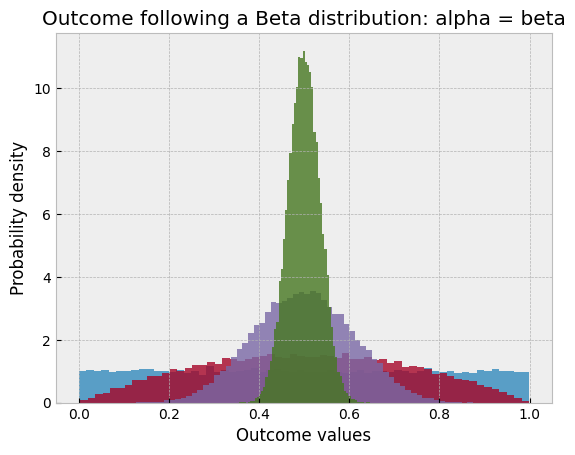

In [2]:
fig, ax = plt.subplots()
plot_beta_hist(ax, 1, 1)
plot_beta_hist(ax, 2, 2)
plot_beta_hist(ax, 10, 10)
plot_beta_hist(ax, 100, 100)
ax.set_title("Outcome following a Beta distribution: alpha = beta")
ax.set_xlabel('Outcome values')
ax.set_ylabel('Probability density')
plt.show()

### Case $\alpha$ > $\beta$
The distribution is **shifted to the right** and **skewed to the right**.  

**Note**: As $\alpha$ and $\beta$ increase, the asymmetry becomes less noticeable.


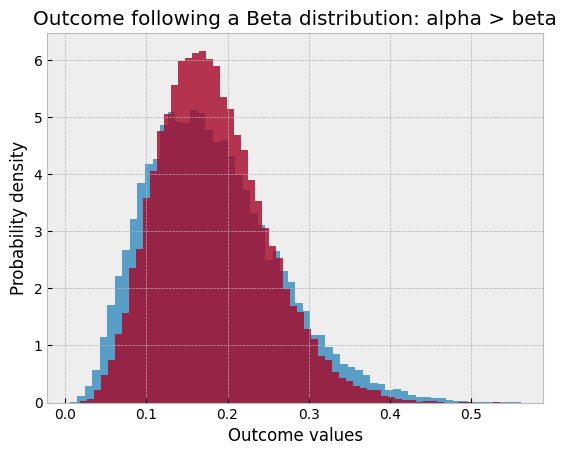

In [3]:
fig, ax = plt.subplots()
plot_beta_hist(ax, 4, 18)
plot_beta_hist(ax, 6, 27)
# plot_beta_hist(ax, 15, 2)
# plot_beta_hist(ax, 30, 10)
# plot_beta_hist(ax, 150, 50)
ax.set_title("Outcome following a Beta distribution: alpha > beta")
ax.set_xlabel('Outcome values')
ax.set_ylabel('Probability density')
plt.show()

### Case $\alpha$ < $\beta$  
The distribution is **shifted to the left** and **skewed to the left**.  

**Note**: As $\alpha$ and $\beta$ increase, the asymmetry becomes less noticeable.


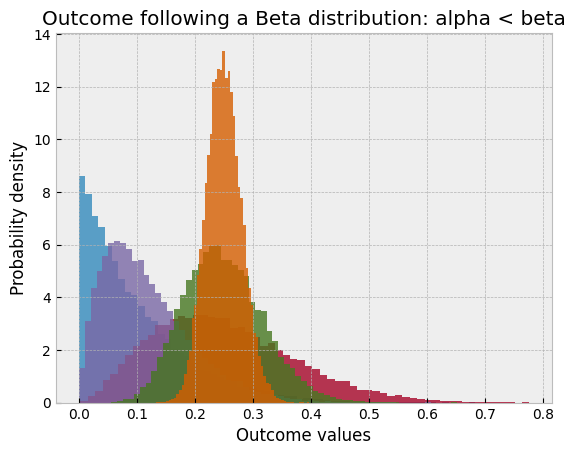

In [4]:
fig, ax = plt.subplots()
plot_beta_hist(ax, 1, 9)
plot_beta_hist(ax, 3, 9)
plot_beta_hist(ax, 2, 15)
plot_beta_hist(ax, 10, 30)
plot_beta_hist(ax, 50, 150)
ax.set_title("Outcome following a Beta distribution: alpha < beta")
ax.set_xlabel('Outcome values')
ax.set_ylabel('Probability density')
plt.show()

# **Estimating the Probability Distribution of a Probability (sic)**

## **Business Case**
- Suppose we previously sent a monthly **newsletter** (containing a call to action: purchase something) to a **customer base of $N = 500$ customers**.  
- **100 customers** opened the email and responded positively to the call to action.  
- We want to estimate the **redemption rate** of the newsletter, i.e. the success rate.  
- We know the **sample mean**, which is:  
  $$
  \text{sample mean} = \frac{100}{500} = 0.20 = 20\%
  $$  
  However, we **want to estimate a probability distribution** that accounts for **uncertainty**, since in real life, **things are random**.  
- A **Beta distribution** is a natural choice, and we can use the **method of moments** to estimate its parameters.

<br>

## **Method of Moments**
The **method of moments** was first developed by **Karl Pearson** (a legend).  
He proposed that **good parameter estimates** for a probability distribution should be those that make its **theoretical moments** (e.g., mean, variance, skewness, kurtosis) **match** the corresponding **sample moments**.

Given a set of observations $\{X_1, X_2, \dots\}$ and a probability density function (e.g., a **Beta distribution**), the approach is:
1. **Compute the sample moments**—numerical values obtained from the sample data.  
2. **Set them equal to the theoretical moments**, which are functions of the unknown parameters (e.g., $\alpha$ and $\beta$ for a Beta$(\alpha, \beta)$ distribution).  
3. **Solve the system of equations** to estimate the parameters.

<br>

## **Our Case**
For a **Beta distribution**, the theoretical relationships are:
- **Mean**:
  $$
  \mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}
  $$
- **Additional constraint** (assuming prior sample size matters):
  $$
  \alpha + \beta = N
  $$
  where $N = 500$ (total sample size).

We also know the **sample mean**:
  $$
  \frac{\alpha}{\alpha + \beta} = 0.20
  $$

From these equations (avoiding using the variance - we could, but we don't want to...), we can solve for $\alpha$ and $\beta$:


In [7]:
# solve the system for a, b
N = 500
sample_mean = 0.2
a = N*sample_mean
b = N - a
print("alpha:", a, "beta:", b)

alpha: 100.0 beta: 400.0


Let's plot the Beta distribution:

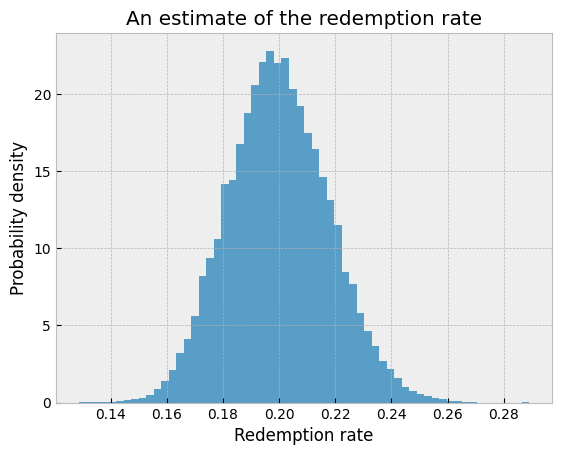

In [8]:
fig, ax = plt.subplots()
plot_beta_hist(ax, a, b)
ax.set_title("An estimate of the redemption rate")
ax.set_xlabel('Redemption rate')
ax.set_ylabel('Probability density')
plt.show()

Now we are ready for the Bayesian Beta-Binomial model...

<br>

# **The Bayesian Beta-Binomial Model**

For an overview of the model, see:  
- [An Introduction to the Beta-Binomial Model](https://compcogsci-3016.djnavarro.net/technote_betabinomial.pdf).
- [The Beta-Binomial Bayesian Model](https://www.bayesrulesbook.com/chapter-3.html).
- [To the Basics: Bayesian Inference on a Binomial Proportion](http://www.obscureanalytics.com/2012/07/04/to-the-basics-bayesian-inference-on-a-binomial-proportion/).

For an introduction to **Bayesian Statistics**, refer to:  
- [Basics of Bayesian Statistics](https://www.stat.cmu.edu/~brian/463-663/week09/Chapter%2003.pdf).
- The free online book: [*Bayes Rules! An Introduction to Applied Bayesian Modeling*](https://www.bayesrulesbook.com/).

<br>

This is a streetfighting summary of Bayes' theorem...

# **Bayes' Theorem for Continuous Distributions**

In Bayesian inference, given:  
- A **prior distribution** $p(\theta)$, representing our initial belief about the parameter $\theta$  
- A **likelihood function** $p(x \mid \theta)$, representing the probability of observing the data given $\theta$  

The **posterior distribution** is obtained by applying Bayes' theorem:  
$$
p(\theta \mid x) \propto p(x \mid \theta) p(\theta)
$$
where the proportionality holds because we can normalize using the evidence:  
$$
p(\theta \mid x) = \frac{p(x \mid \theta) p(\theta)}{p(x)}
$$
with $p(x) = \int p(x \mid \theta) p(\theta) d\theta$ ensuring the posterior integrates to 1.

### **Key Idea**  
The **posterior** is proportional to the product of the **likelihood** and the **prior**:  
- **Prior**: what we believed before observing the data.  
- **Likelihood**: how well the data supports different parameter values.  
- **Posterior**: our updated belief after incorporating the evidence.


<br>

## **Business Case #1: Learning from Data Over Time**
- We want to **assess the probability of success** of our **special content**, the monthly newsletter designed to encourage service purchases.  
- Last month, we **sent the newsletter for the first time** and estimated the **probability density function** of the redemption rate (see previous example).  
- Now, we have sent it again to **200 new customers**.  
- **Results**:  
  - **25 customers** responded positively.  
  - The **sample mean** is:  
    $$
    \frac{25}{200} = 0.125
    $$
  - Using the **method of moments**, we estimate:  
    $$
    \alpha_2 = 25, \quad \beta_2 = 175
    $$
- We now **want to combine old and new information** in a meaningful and rigorous way using a **Bayesian model**.

---

## **Prior**
The **prior distribution** is the **previous estimate**, modeled as:  
  $$
  \text{Beta}(\alpha_1 = 100, \beta_1 = 400)
  $$
  with $N_1 = 500$ (previous sample size).

---

## **Likelihood**
The **new information** (second newsletter campaign) is modeled as:  
  $$
  \text{Beta}(\alpha_2 = 25, \beta_2 = 175)
  $$
  with $N_2 = 200$ (new sample size).

---

## **Posterior**
The **posterior distribution** combines prior and likelihood to produce an **updated estimate**.  
Using Bayesian updating, we obtain:  
  $$
  \text{Beta}(\alpha_1 = 100, \beta_1 = 400) \times \text{Beta}(\alpha_2 = 25, \beta_2 = 175)
  $$
  which simplifies to:  
  $$
  \text{Beta}(\alpha_1 + \alpha_2, \beta_1 + \beta_2) = \text{Beta}(125, 575)
  $$

Let's plot the distributions.


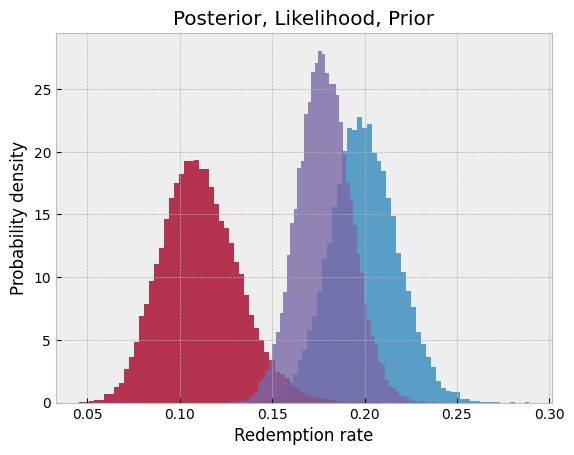

In [9]:
fig, ax = plt.subplots()
plot_beta_hist(ax, 100, 400)
plot_beta_hist(ax, 25, 200)
plot_beta_hist(ax, 125, 575)
ax.set_title("Posterior, Likelihood, Prior")
ax.set_xlabel('Redemption rate')
ax.set_ylabel('Probability density')
plt.show()

<br>

Now we are ready to use this model to update our Financial personas obtained via clustering

<br>

# Updating Financial Personas with new data (numerical data)

## **Objective**
We have a vector representing a **Financial Persona**, with $K = 5$ characteristics (note: $K=5$ is for simplicity; typically, $K=20 \div 80$), each defined within the range $[0,1]$. Initially, this vector describes a **generic reference profile**, derived from Personas. As we collect real numerical data on an individual, we update their profile to make it **more personalized**.

<br>

## **Bayesian Approach**
- Each numerical characteristic, meaning each element of the vector, is modeled as a **Beta distribution** $\text{Beta}(\alpha, \beta)$, which represents our initial information, including uncertainty (the spread of the distribution).
- The **initial mean** of each characteristic corresponds to the value of the Financial Persona, i.e., the respective element of the vector that represents it:  
  $$
  \mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}
  $$
- Since we need to estimate the values of $\alpha$ and $\beta$, we leverage knowledge of the mean value and an assumption about the sum of the two parameters, which carries an important meaning regarding the "amount of information" available. We set $\alpha + \beta = N$, where $N = 20$ is a hypothetical "sample size" representing the amount of information contained in this initial estimate via Personas. This **determines the weight of the initial estimate**. If we assume that the initial information from Personas is worth, for example, twice as much, then we set $\alpha + \beta = N$ with $N = 40$, and so on.
- When a new data point $x$ arrives for a characteristic (i.e., an element of the vector), we update it following **Reverend Bayes' teachings**:
  $$
  \alpha' = \alpha + x \cdot N, \quad \beta' = \beta + (1 - x) \cdot N
  $$
  always using $N$, so that each new data point has a **balanced impact** on the initial estimate.  
  In reality, as new information arrives, $N$ should/could increase by an amount corresponding to the **sample size of the new data**, which represents its quality.  
  (For example, if the initial information is $N(0) = 20$, and then we receive **high-quality** new data, say about twice as valuable, we would update to $N(1) = 40$, and so on.)  
  As $N$ increases—along with $\alpha$ and $\beta$—the distribution **narrows** accordingly.

  But let's keep it simple here—this is just to illustrate the concept (you’ll handle the full implementation yourself, if you like this approach 😉).

  <br>

### **Summary of the Steps in the Code**
1. **Start with the Financial Persona**: a vector where all numerical elements have values in the range $[0,1]$.
2. **Compute $\alpha$ and $\beta$** for the initial Beta distribution.
3. **Generate $T$ sequential updates**, setting $T=3$ for simplicity (new data points—here they are random values, but in reality, they could be derived from text processing with an LLM, transaction records from a bank or postal service, a form submission, or something similar. Whatever. However, they must always be processed and normalized within $[0,1]$).
4. **Apply the Bayesian update and visualize the posterior Beta distributions**.

<br>

### **Key Takeaways**
By incorporating new information, we **transition from a Financial Persona to a more precise, individualized representation** of the subject, as the profile adapts to real data.

<br>

### **Side Note**
Information damping techniques can also be applied when data becomes obsolete.  
For example, in the Bayesian update, the prior information (i.e., the previous values of $\alpha$ and $\beta$) can be multiplied by a factor **less than 1**, known as the **"information obsolescence factor"**.

<br>


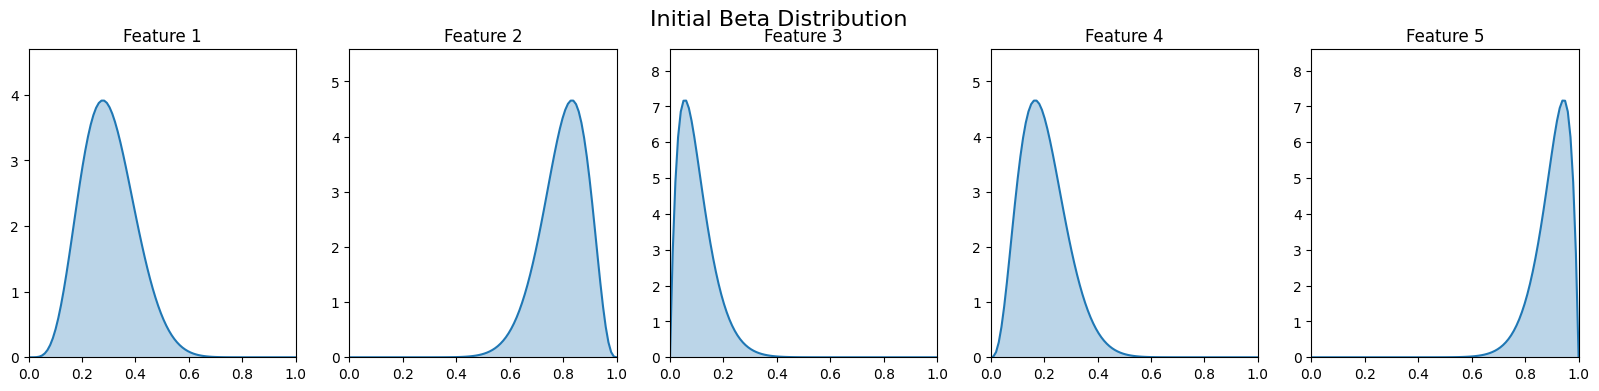

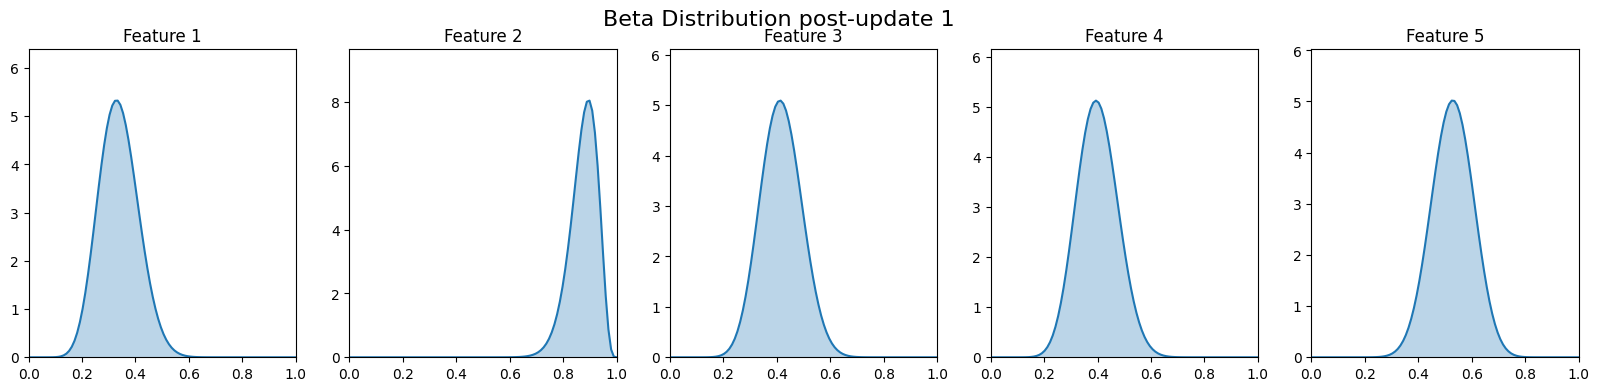

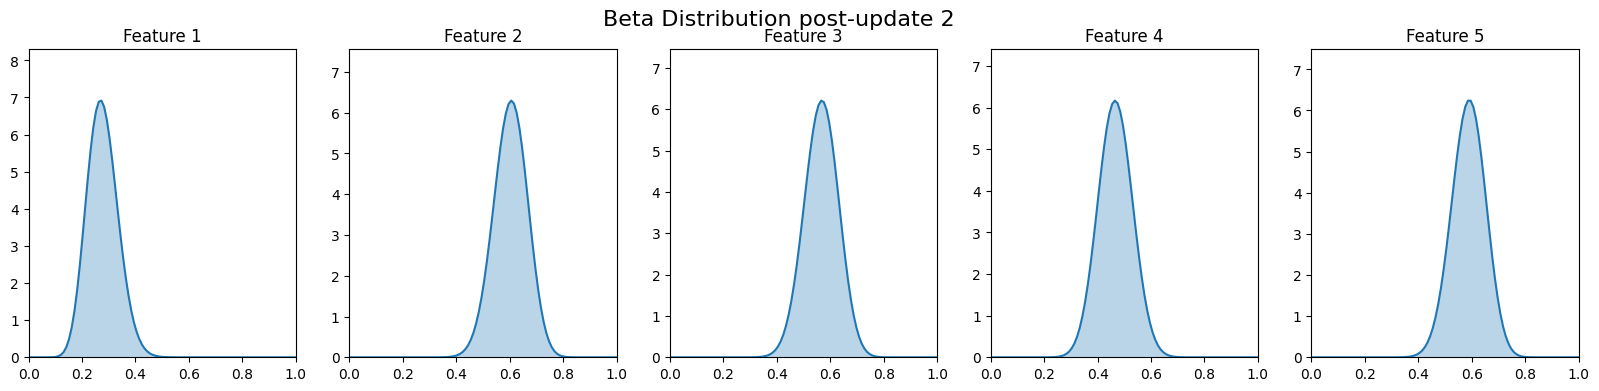

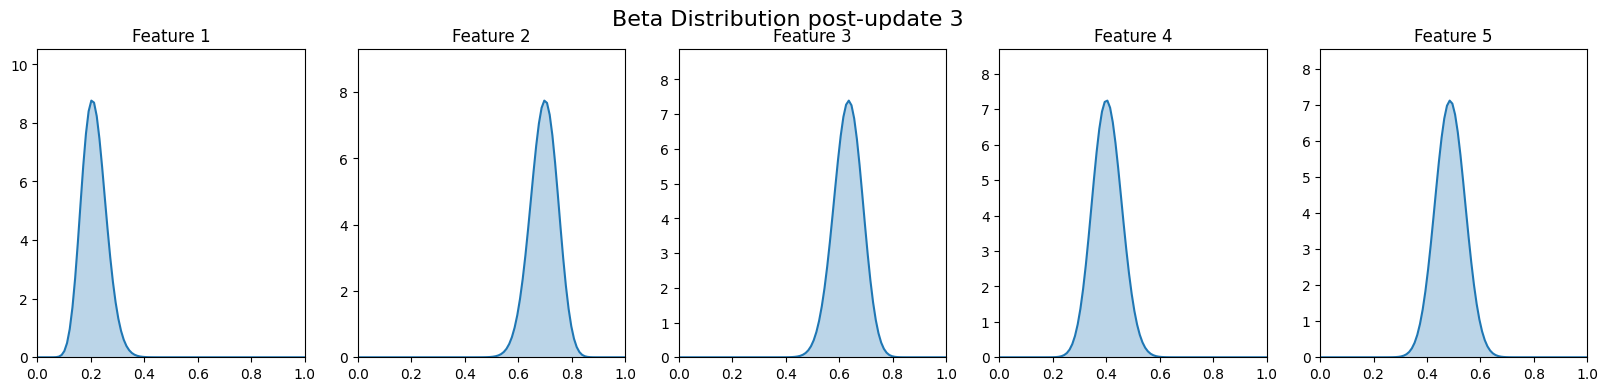

In [ ]:

import scipy.stats as stats

# Initial settings (just an example)
N = 20  # Initial sample information weight of the Financial Persona
persona = np.array([0.3, 0.8, 0.1, 0.2, 0.9])  # Initial vector of the Persona

# Compute initial α and β parameters for the Beta distribution
alpha = persona * N
beta = (1 - persona) * N

# Generate 3 hypothetical sequential updates with values in [0,1]
np.random.seed(42)
updates = np.random.uniform(0, 1, (3, 5))

# Function to update α and β (technically, N could increase...)
def Bayesian_update(alpha, beta, update, N):
    alpha_new = alpha + update * N
    beta_new = beta + (1 - update) * N
    return alpha_new, beta_new

# Function to plot the Beta distribution of each vector element
def plot_beta_distributions(alpha, beta, title):
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    x = np.linspace(0, 1, 100)

    for i in range(5):
        y = stats.beta.pdf(x, alpha[i], beta[i])
        axes[i].plot(x, y, label=f'Feature {i+1}')
        axes[i].fill_between(x, y, alpha=0.3)
        axes[i].set_title(f'Feature {i+1}')
        axes[i].set_xlim(0, 1)
        axes[i].set_ylim(0, max(y) * 1.2 if max(y) > 0 else 0.1)

    plt.suptitle(title, fontsize=16)
    plt.show()

# Plot the initial Beta distribution = Financial Persona
plot_beta_distributions(alpha, beta, "Initial Beta Distribution")

# Plot the Beta distributions after sequential updates (i.e., posterior)
for i, update in enumerate(updates):
    alpha, beta = Bayesian_update(alpha, beta, update, N)
    plot_beta_distributions(alpha, beta, f"Beta Distribution post-update {i+1}")


## Extensions

This is Beta-Binomimial approach is a **univariate** method: each characteristic of a Persona's profile evolves independently of the others, without considering possible correlations. However, correlations do exist—just think of the dichotomy between an **investment accumulation need vs. a decumulation need** (typically if you need accumulation you don't need decumulation, they are two distinct phases of a customer's life).

This issue can be addressed in several ways:

* **Relying on coherent information updates**: if the data source is well-structured, the update process should lead to a **meaningful variation** of the vector elements.  
  (For example, if a transcript of a video call is processed by an LLM, it may simultaneously detect the presence of one need and the absence of another.)
* **Employing a multivariate approach from the start**
  Something worth exploring, if you are curious.

  <br>


# **Multivariate Bayesian Update of a Financial Persona: Gaussian Model**

<br>

This is an example of a **Multivariate Gaussian Bayesian Update** aimed to refine an individual's profile starting from an **initial Financial Persona**.

<br>

## **Objective**
We start with the same vector as before, representing a **Financial Persona**—the initial setup is identical...  

However, unlike the **univariate Beta-Binomial model**, here we **account for correlations between characteristics** and use a **Multivariate Gaussian (MVN) model** for the Bayesian update.

<br>

## **Multivariate Bayesian Approach**
- We transform the Financial Persona numerical component of the vector using the **logit transformation**:  
  $$
  z = \log\left(\frac{x}{1-x}\right)
  $$
  to map values from $[0,1]^K$ to $\mathbb{R}^K$, avoiding ad hoc constraints in modeling.

- We assume the **prior** follows a **MVN** with:  
  - **Initial mean** $\mu_0$, set to the logit-transformed vector of the Financial Persona;  
  - **Covariance matrix $\Sigma_0$, assumed known and fixed**, estimated from historical data (though in this example, it is entirely artificial).  

- When a new data point (a vector in $[0,1]^K$) arrives:  
  - We transform it into $y$ using the logit function to map it into $\mathbb{R}^K$;  
  - We apply the **standard Bayesian update for a MVN with fixed covariance**:
    $$
    \mu' = \mu_0 + K(y - \mu_0)
    $$
    where $K = \Sigma_0 (\Sigma_0 + \Sigma_n)^{-1}$ is the **Kalman gain** (which determines how much weight to give to new data relative to the prior).  
    _Note: this is effectively a Kalman filter._

- Finally, we **map the updated values back to the original space** $[0,1]^K$ using the inverse logit (sigmoid) function:  
  $$
  x' = \frac{1}{1 + e^{-z'}}
  $$

<br>

## **Defining the Covariance Matrix (Example Setup)**
- To account for **dependencies between characteristics**, here in this simplistic example we define $\Sigma_0$ based on extremely simplistic assumptions, since this is just an example...:
  - **Standard deviation vector**: $\sigma = 0.3$ or whatever for each characteristic;
  - **Uniform correlation matrix**: off-diagonal elements set to $0.5$.  
    _(We can use any values, as long as the matrix is invertible...)_
  - The **final covariance matrix** is computed as:
    $$
    \Sigma_0 = \sigma \sigma^T \cdot \text{corr\_matrix}
    $$
  - To ensure **invertibility**, we add a small amount of noise to the diagonal ($10^{-6}$).

Of course, if you implement this method, you must estimate the covariance directly from the **customer matrix** (the numerical part of it, i.e. Needs and propensities).  

<br>


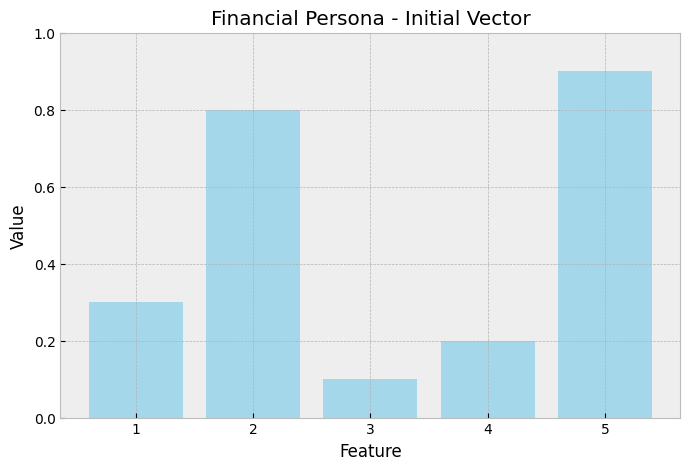

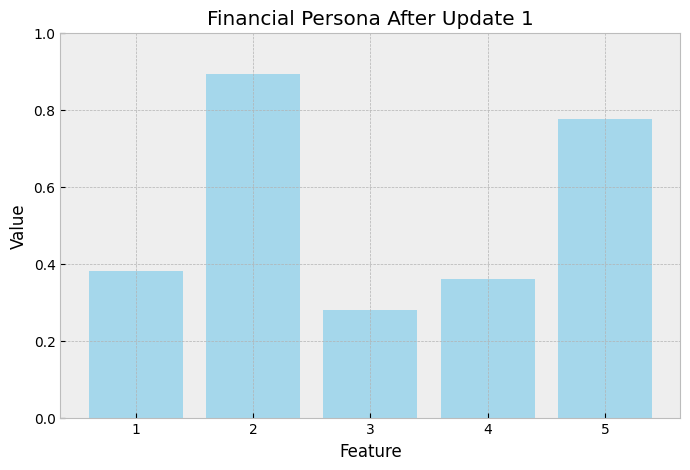

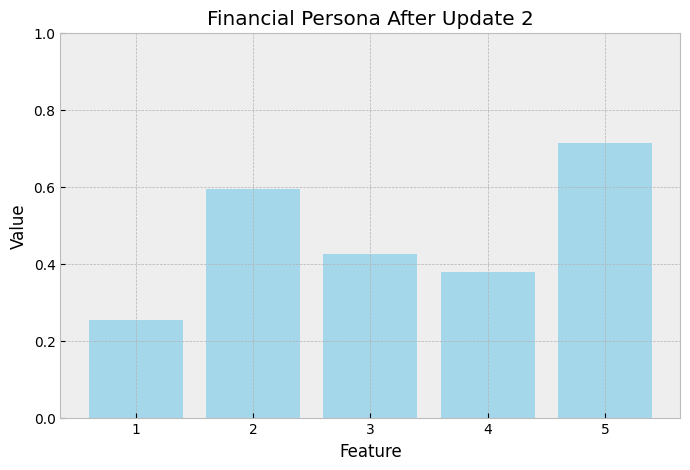

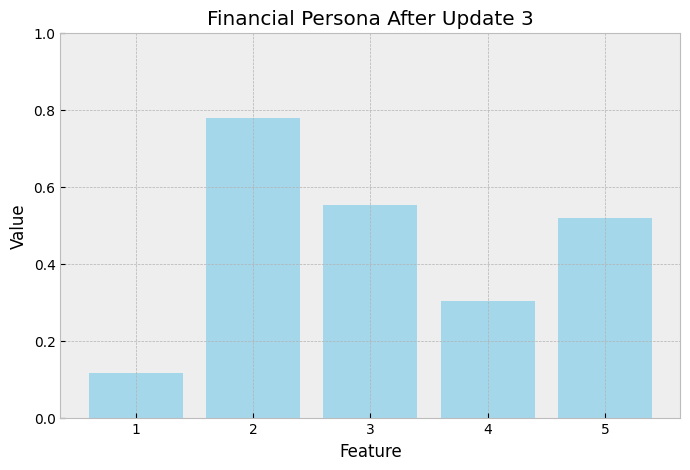

In [10]:

# Initial settings (same as before, just to recap...)
N = 20  # Initial sample weight of the Financial Persona
persona = np.array([0.3, 0.8, 0.1, 0.2, 0.9])  # Initial Persona vector
K = len(persona)  # Length of the vector describing the Persona

# Logit and inverse logit (sigmoid) transformation functions
def logit(x):
    return np.log(x / (1 - x))

def inverse_logit(z):
    return 1 / (1 + np.exp(-z))

# Transform the initial Persona vector into the R^K space
mu_0 = logit(persona)

# The covariance matrix is created arbitrarily, but since it's a bit tricky,
# let's start by defining standard deviations and a correlation matrix,
# assumed to be uniform for simplicity.

# Create the covariance matrix Σ_0
std_devs = np.full(K, 0.3)  # Uniform standard deviations
correlation = 0.5  # Uniform off-diagonal correlation

# Create the correlation matrix
corr_matrix = np.full((K, K), correlation)
np.fill_diagonal(corr_matrix, 1)

# Compute the covariance matrix Σ_0 from std_devs and correlation matrix
Sigma_0 = np.outer(std_devs, std_devs) * corr_matrix

# Ensure the matrix is invertible by adding a small amount of noise to the diagonal
Sigma_0 += np.eye(K) * 1e-6

# Generate 3 (you can change this value) hypothetical sequential updates with values in [0,1]
np.random.seed(42)
updates = np.random.uniform(0, 1, (3, K))

# Function to update the mean of the MVN with fixed covariance
def bayesian_update_mvn(mu, Sigma, new_data):
    # Transform new data into logit space
    y = logit(new_data)

    # Standard Bayesian update for an MVN with fixed covariance
    K_gain = Sigma @ np.linalg.inv(Sigma + np.eye(K) * 0.1)  # Kalman gain
    mu_new = mu + K_gain @ (y - mu)

    return mu_new

# Function to plot updated values in the original [0,1] domain
def plot_persona(persona, title):
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, K+1), persona, color='skyblue', alpha=0.7)
    plt.xticks(range(1, K+1))
    plt.ylim(0, 1)
    plt.title(title)
    plt.xlabel("Feature")
    plt.ylabel("Value")
    plt.show()

# Plot the initial Financial Persona profile
plot_persona(persona, "Financial Persona - Initial Vector")

# Sequential updates and plot of the results
mu = mu_0  # Initialize the mean

for i, update in enumerate(updates):
    mu = bayesian_update_mvn(mu, Sigma_0, update)
    persona_updated = inverse_logit(mu)
    plot_persona(persona_updated, f"Financial Persona After Update {i+1}")



# **HINTs**:
* **Generate some new data (i.e., synthetic data) for some elements of the vectors describing the Financial Personas and update the Financial Personas** you have estimated before, using clustering techniques, using a method of your choice.

* **Experiment with different patterns of new information** to understand how intensely the Person's profile changes.

<br>